In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Assume you have this dataset:

<img src="least_sq_data1.png" width=550 height=250 />

### You know that the data should follow an equation of the form:

y = a*x +b 

### but, how do you find the best-fit model? 


### One way would be to try different models, use different a and b parameters and see which one fits the data best right? Let’s try different models of this form:


<img src="least_sq_data2.png" width=550 height=250 />

### which one is the best? 

### We need a way to quantify what "best-fit" model means 

### $\Sigma_i  \frac{(O_i - E_i )^2}{E_i}$ 

#### where, $O_i$ is our data and $E_i$ the expected model points

### --> we minimize the sum of the squares of the offsets ("the residuals") of the points from the curve; The smaller $R^2$  is, the better the  model fits the data!

<img src="least_sq_data3.png" width=550 height=250 />

### So far we ignored that our data can have an error bar. Assuming that the data/measurements are independent of each other and that they are normally distributed, if we have N independent variables $y_i$ with mean $\mu_i$ and variance $\sigma^2_i$, we can define $\chi^2$ as :

### $\chi^2$ = $\Sigma \frac{(y_i - \mu_i)^2}{\sigma^2_i}$

### Note that the error we fit is in the y dimension; we assume that the mean x position is accurate. If $y$ data follow a gaussian (i.e., normal) distribution this process is the chi-square minimization and is the same as least squares fitting – if not you do a least squares 

### the premise of the $\chi^2$ test is that the deviations from the model are due to statistical fluctuations due to our limited numbers of observations per bin, i.e. we deal with "noise" or Poisson statistics


#### Important to remember are the  degrees of freedom (dof) : 

$n = N_{data-points} – N_{fitted-parameters}$

#### You want $\chi^2 / n < 1 $


### General form:

## $\chi ^2 = \Sigma w_i  (y_i - f_i)^2 $

#### where weight $w_i$ can be:

- $\frac{1}{\sigma_i}$ 

- $\frac{1}{f_i}$ 

#### If observations are correlated we need to calculate the ‘covariance matrix’


### Let's do some fitting of our own now:

### We observed this data:

In [2]:
x = np.arange(1,22,1)
y = np.array([ 6.89632026, 11.93880672 ,18.51618226, 15.32061411, 23.5375446,  21.62910794,
 18.6627083,  24.86024463, 28.89751315, 32.41984013, 30.96236269, 33.45884498,
 39.66476063, 34.761296,   39.17902872, 39.13987917, 41.04070812, 47.65140802,
 48.76335871, 46.62044392, 53.46507287])

### Let's visualize it first:

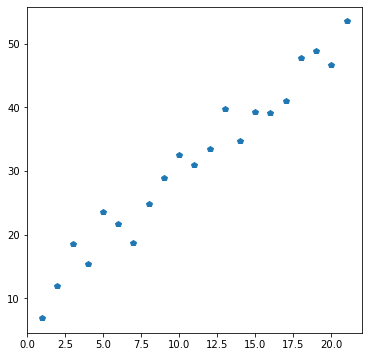

In [3]:
plt.figure( figsize = (6,6) )
plt.plot( x, y, marker = 'p', linestyle = 'none')

### what do you think is the underlying model for these data?

### make a model of the form y_theoretical = ax + b 
### then scan different values of a $\in [0.1, 8) $ and b $\in [0.1, 10) $ ; calculate the ( (y-ytheory)**2/y_theory) and find the minimum. 


In [4]:
a = np.arange( 0.1, 8, 0.1 )
b = np.arange( 0.1, 10 , 0.1 ) 

In [5]:
r_square = np.zeros( ( len( a ), len( b ) ) )

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        r_square[ i, j ] = np.sum( ( y - y_theory )**2 / y_theory )


In [6]:
## which is our min?
print( np.min(r_square) )

6.275464699300539


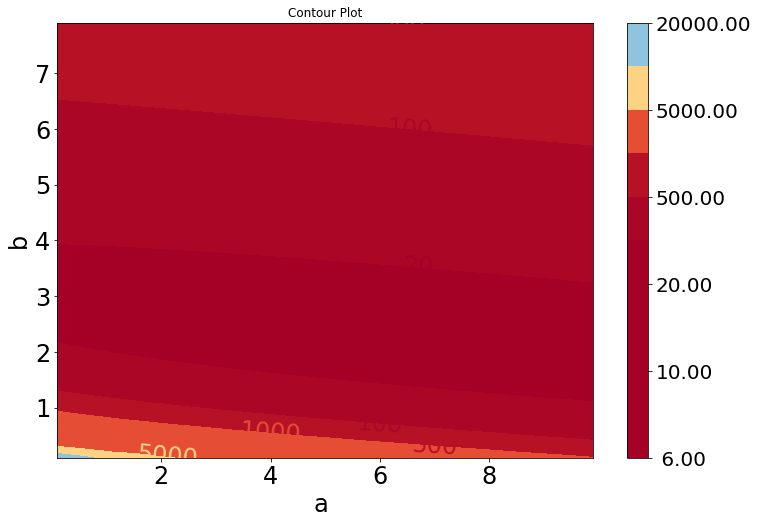

In [7]:
### let's see how large the change of our chi^2 is:

fig, ax = plt.subplots(1, 1,figsize=(12,8))
cp = plt.contourf(b, a, r_square,levels = [ 6,7, 10, 14 ,20, 100, 500,1000, 5000, 10000, 20000],cmap='RdYlBu')
plt.clabel(cp, inline=True, 
          fontsize=24)
plt.title('Contour Plot')
plt.xlabel('a ',fontsize=24)
plt.ylabel('b',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

cbar = fig.colorbar(cp, format='%5.2f')
cbar.ax.tick_params(labelsize=20)

In [8]:
#use the minimum value to plot your data:
#-------------------------------------------------------

# find where chi_square is minimum:
q  = np.where( r_square == np.min( r_square ) )
# get the correct model for that minimum:
y2 = a[ q[0] ] * x + b[ q[ 1 ] ]


Text(0, 0.5, 'Quantity 2')

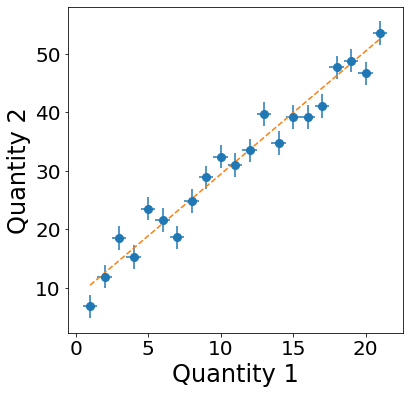

In [9]:


# make the plot:
plt.figure( figsize = ( 6, 6 ) )

# plot your data:
plt.errorbar( x, y, yerr = 2., xerr = 0.5,linestyle='none', marker='o', markersize = 8 )
# overplot your minimum chi_square model:
plt.plot( x, y2,linestyle = '--' )


plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.xlabel('Quantity 1', fontsize = 24 )
plt.ylabel('Quantity 2', fontsize = 24 ) 


### let's do the same but now using the $\chi^2$ ( (y-y_theory)**2/sigma**2) and find the minimum; assume $\sigma = 5$.


In [10]:

a = np.arange(0.1, 8 , 0.01)
b = np.arange(0.1, 10 , 0.01)

chi_square = np.zeros( ( len( a ), len( b ) ) )

sigma = 5

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        chi_square[ i, j ] = np.sum( ( y - y_theory )**2 / sigma**2 )


In [11]:
print(np.min(chi_square))

5.644147387075356


Text(0, 0.5, 'Quantity 2')

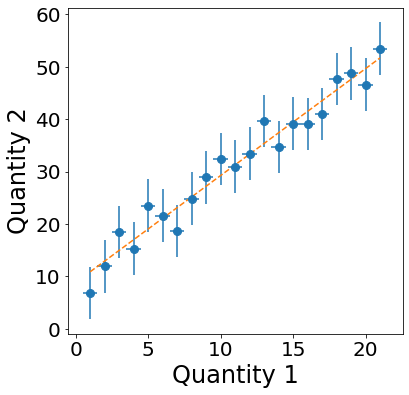

In [12]:

#use the minimum value to plot your data:
q  = np.where( chi_square == np.min( chi_square ) )
y2 = a[ q[ 0 ] ]*x + b[ q[ 1 ] ]


# make the plot:
plt.figure(figsize=(6,6))

plt.errorbar(x, y, yerr=sigma, xerr=0.5,linestyle='none', marker='o', markersize = 8)
plt.plot(x,y2,linestyle='--')


plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.xlabel('Quantity 1', fontsize = 24)
plt.ylabel('Quantity 2', fontsize = 24)


### You will be pleased to know that Python has --of course-- done the work before you, for you....Enter Scipy ( https://www.scipy.org/ ) and its stats package ( https://docs.scipy.org/doc/scipy/reference/stats.html )

### Scipy has packages that do data fitting for you:

- least_squares
- curve_fit
- chisquare


In [13]:
from scipy.stats import chisquare

In [14]:
#make a dataset:
a1 = np.array( [ 16, 18, 16, 14, 12, 12 ] )  
a2 = np.array( [ 16, 16, 16, 16, 16, 8 ] )

In [15]:
# call chisquare with y_observations, y_expected_from_model

a = chisquare( a1, f_exp = a2  )    

In [16]:
print( a )

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)


In [17]:
## returns chi-squared test statistic and p-value of the test (here you see it is very likely that our 
## data would have been observed )

### We observed a target moving at times t and has a displacement s:


In [18]:
t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163]

### Can you figure out if the target had a constant velocity u or if it was accelerating? Reminder: 
- if object had a constant speed: s = u * t + const
- if object had an acceleration: s = 0.5 * a* t + u * t + const
### assume a$\in[0.1, 28)$, const $\in [0.1, 40)$ , u  $\in [0.1, 40)$

### is there something you can do to get a feeling for what the answer should be?

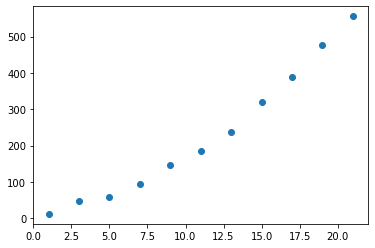

In [19]:
plt.plot(t,s,marker='o',ls='none')

In [25]:
a=np.arange(0.1,20,0.1)
c=np.arange(0.1,40,0.1)
u=np.arange(0.1,40,0.1)

In [28]:
#try constant linear model
r1= np.zeros( [len(u),len(c)])

for i in range ( len( u )):
    for j in range( len( c )):
            ytheory= u[i] * t + c[j]
            r1[i,j]=np.sum(((s-ytheory)**2)/ytheory)

In [29]:
print(np.min(r1))

119.87010810164608


In [32]:
#try accelerating model
r2=np.zeros( (len(u),len(a),len(c)))

for i in range( len( u)):
    for j in range( len( a)):
        for k in range(len (c)):
            ytheory = u[ i ] * t + a[ j ] * 0.5 * t**2 +c[k]
            r2[i,j,k]= np.sum(((s-ytheory)**2)/ytheory)
        

KeyboardInterrupt: 

In [ ]:
print(np.min(r2))

### we now know that our car *was* .....!

### Of course, Scipy has already the tools for you to do the fitting:

In [33]:
from scipy.optimize import curve_fit

In [34]:
### set up your function for a car that accelerates:

def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
    print ("speed=",u, "acceleration=",a, 'constant=',c)
    return c + u* t + 0.5 * a * t**2 


In [35]:
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )


speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0
speed= 1.0000000149011612 acceleration= 1.0 constant= 1.0
speed= 1.0 acceleration= 1.0 constant= 1.0000000149011612
speed= 1.0 acceleration= 1.0000000149011612 constant= 1.0
speed= 5.220519620817351 acceleration= 1.9931801582084632 constant= 10.931105372534423
speed= 5.220519698609155 acceleration= 1.9931801582084632 constant= 10.931105372534423
speed= 5.220519620817351 acceleration= 1.9931801582084632 constant= 10.931105535420587
speed= 5.220519620817351 acceleration= 1.993180187909162 constant= 10.931105372534423
speed= 5.220521177726987 acceleration= 1.9931800082152702 constant= 10.931100393644867


speed= 5.220521177726987 acceleration= 1.9931800082152702 constant= 10.931100393644867


Text(0, 0.5, 'Distance')

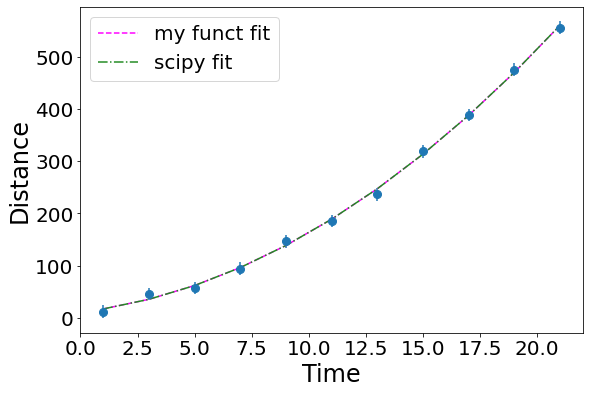

In [36]:
# let's compare the fits:


y4 = 5.22052 *t + 0.5 * 1.99318 * t**2 + 10.9311

plt.figure( figsize = (9, 6 ) )

plt.errorbar( t, s, yerr = 12., linestyle = 'none', marker='o', markersize = 8 )

# plot the new fit
plt.plot( t , y4, linestyle = '--', color = 'magenta', label = 'my funct fit' )

# or:
plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)

#works nice on this example! Let's see more examples

### We have data following this sine function: $ w = a* \sin(2*\pi \frac{t}{b})+c $


In [37]:

tw = np.arange(1,40,1)
w  = np.array([ 3.96838123,  1.2347536 , -0.28659576  ,0.16064933,  2.54715953,  1.27815974,
 -0.91929229 , 0.01300393 , 3.39636575 , 0.66465094, -1.41158169,  0.93323834,
  2.40457184,  0.79842956, -0.15261201 , 0.39569446,  2.97101324 , 0.47594539,
 -0.91273741 , 0.63033213,  3.57350699 , 1.56527141, -1.60574013 , 1.69854318,
  3.0131255   ,1.55600848, -1.67872146,  1.3382831 ,  3.21238516 , 0.32514177,
 -1.15733227 , 1.25311931,  2.4676918 ,  0.76427433, -1.43557062 , 1.70145249,
  2.50683363 , 0.43278036, -0.41304183])

### Let's fit it assuming that a,b and c $\in [0.1,6)$ and $\sigma = 0.8$

In [38]:
a = np.arange( 0.1, 6, 0.1 )
b = np.arange( 0.1, 6 , 0.1 )
c = np.arange( 0.1, 6 , 0.1 )

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = .8

for i in range( len( a ) ):
    for j in range( len( b ) ):
        for k in range( len( c ) ):
            w_theory              = a[ i ] * np.sin( 2 * np.pi * tw / b[ j ] ) + c[ k ]
            chi_square[ i, j, k ] = np.sum( ( w - w_theory )**2 / sigma**2 )



Text(0, 0.5, 'wave')

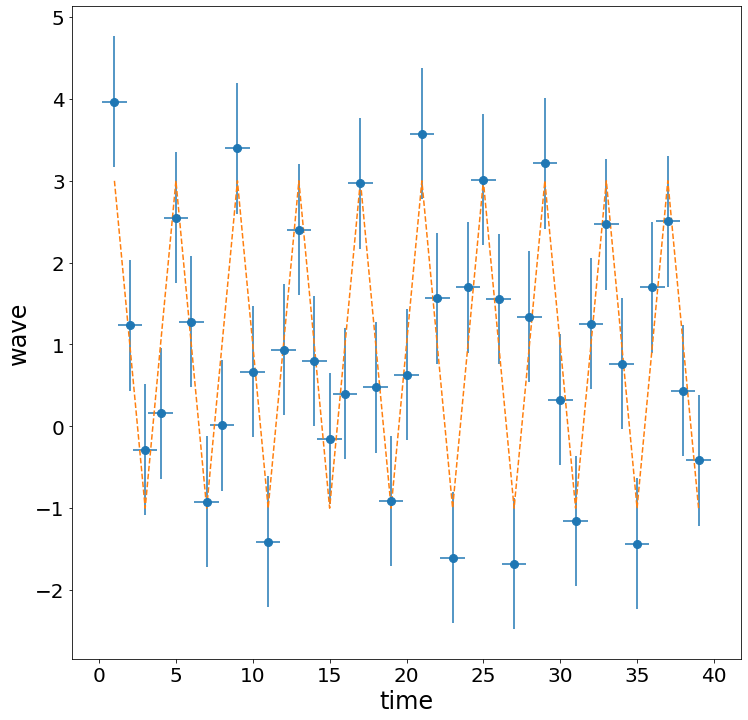

In [39]:
#use the minimum value to plot your data:
q = np.where(chi_square == np.min( chi_square ) )
#print( np.min(chi_square), a[ q[ 0 ] ], b[ q[ 1 ] ], c[ q[ 2 ] ] )

y2 = a[ q[ 0 ] ] * np.sin( 2 * np.pi * tw / b[ q[ 1 ] ] ) + c[ q[ 2 ] ]

plt.figure( figsize = ( 12 , 12 ) )

plt.errorbar(tw, w, yerr=sigma, xerr = 0.8,linestyle='none', marker='o', markersize = 8)
plt.plot(tw, y2,linestyle='--')


plt.xticks( fontsize =20)
plt.yticks( fontsize = 20)
plt.xlabel('time', fontsize = 24)
plt.ylabel('wave', fontsize = 24)


### Is this a sine or cosine function?

In [40]:


tw = np.arange(1,40,1)
w  = np.array( [ 2.73155223e+00 , 3.17368658e+00 , 2.08082264e+00,  7.08391866e-01,
 -1.02196616e-01, -3.66845259e-01, -7.47889353e-01,  8.52096473e-01,
  2.13320321e+00,  2.73754612e+00,  2.36456758e+00,  1.66566340e+00,
 -6.78664125e-01, -1.12492492e-01, -1.92925580e-01,  1.59608994e+00,
  2.94364482e+00,  2.39214715e+00,  2.42116101e+00,  7.49597754e-01,
 -1.26025273e+00, -6.33402949e-01,  8.56344418e-02 , 1.84353600e+00,
  2.47992405e+00,  2.76758273e+00,  3.01939636e+00,  4.81326171e-01,
 -1.12837078e+00, -3.75890761e-02, -1.33917103e+00,  3.20806668e-01,
  1.83529070e+00,  2.03098421e+00,  2.33727279e+00,  2.72209809e-03,
 -6.47557862e-01, -4.87585375e-01, -3.13698707e-01] )



### Let's try curvefit:

### Oops! What happened here? 

### curve_fit got stuck in a local minimum.....

### Caution: some methods are prone to getting stuck in local (not the global) minima! 


### 1. Read practise_reading_numpy.dat from demos/ in a numpy array. Assign its columns to arrays x, y, z, w and q. Plot q(x). Your observations could be a function of the form:

- sin( 2 $\pi \frac{x}{ P}$ )*A
- cos( 2 $\pi \frac{x}{ P}$) *A
- sin( 2 $\pi  \frac{x}{ P}$ ) * $\log_{10}(\frac{x}{ B}) $* A
- cos( 2 $\pi \frac{x}{ P}$) * $\log_{10}( \frac{x}{ B} )$ * A

### with P, A and B constants. Which is the model that best describes your observations q(x) ? what about z(x) ? Try to find the solution without using curve_fit

In [ ]:
# read in data:



In [ ]:
# plot it first to get a feeling for what the best-fit model might be from all 4 options:


In [ ]:
# what do we need to do now? least-squares fitting:



In [ ]:
# get minimum  and its best fit parameters:


In [ ]:
# check it out:


In [ ]:
# test model np.sin(2*np.pi*x/ P )*np.log10(x /B ) * A, assume errorbar of 1.2 in your measurements:


In [ ]:
# get minimum chi_square and its best fit parameters:



In [ ]:
# check it out:


In [ ]:
#### true model that went in this is: sin( 2 $\pi$ x / P ) * $\log_{10}( x  ) $ check! with P = 5;

### 2. We have numpy arrays: 

x = [0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] 

y =[14.059, 19.18, 26.26,  25.95, 31.567,  44.464, 49.88,  64.016, 79.34, 93.229, 104.985, 113.425, 130.466, 150.331, 168.620, 185.888, 207.500, 225.716, 241.891, 268.802, 287.936] . 

### and y-error bars: 

sigma = [12.536, 13.601, 11.8492, 15.937, 12.6478, 13.927, 11.445, 10.224, 12.981, 10.969, 11.666, 12.060, 10.173, 10.292, 14.507, 12.195, 11.578, 9.321, 12.602, 13.03,8.6004].

### - You know that the data should be fit by the model: $a x^2+b x+c$. Create arrays a1, b1 and c1 that scan the range 0 to 10, 0 to 15 and 0 to 10 respectively, with a step of 0.1 (so a1 = np.arange(0, 10, 0.1) ). For each possible combination of (a1, b1, c1) calculate the least square difference of the model to the observations. Which model is the best fit model? Print the best-fit parameters (a1, b1, c1).

### - Create a function fit_my_curve(t, a, b, c) that fits a curve of the form $a x^2+b x+c$ and calculates the parameters a,b,c. Use curve_fit to fit the data (see demo). Plot y(x) with errorbars sigma, and overplot the fitted curve. Save figure using the appropriate commands and naming conventions.

### - Create a function fit_my_curve_2(params, t, y) that fits a curve of the form $a x^2+b x+c$. Use leastsq to fit the data (see demo). Plot y(x) with errorbars sigma, and overplot the fitted curve. Save figure using the appropriate commands and name conventions.

In [ ]:
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )
y = np.array([14.059, 19.18, 26.26,  25.95, 31.567,  44.464, 49.88,  64.016, 79.34, 93.229, 104.985, 113.425, 
     130.466, 150.331, 168.620, 185.888, 207.500, 225.716, 241.891, 268.802, 287.936] )
sigma = np.array([12.5357806 , 13.60113206, 11.84892057, 15.93705285, 12.64771554,
        13.92678159, 11.44483822, 10.22352192, 12.9813505 , 10.96907422,
        11.66618969, 12.0604899 , 10.17309145, 10.29161505, 14.50724923,
        12.19490092, 11.57796134, 9.32115802, 12.60187156, 13.0297564 ,
        8.60039528])


In [ ]:
# do it brute-force first for y = a* x^2+b * x+c



In [ ]:
# use fcurve_fit



In [ ]:
#try leastsq: 
from scipy.optimize import leastsq



## 3. Is there life out there? 

### You have detected two planets orbiting a star like our Sun and they are in the habitable zone! You need to figure out if they may host life! 

### Get your observational data from file: knightro_2024_bc_photometry.dat and plot it to see what your observations look like (column 1 is wavelength, columns 2 and 3 and the flux from the two planets)

### Get your models from limited_models.dat . Combine up to 3 models at a time and compare with the data. What is the best-fit make up of your your planet?

In [ ]:
# read the "actual observations" we will compare our models with



In [ ]:

#let's plot the observations to see what we deal with:


In [ ]:
#get models; read limited_models.dat; assign: 0: wavelengths, 1: forest, 2: ocean
# 3: sand, 4: ice



In [ ]:
#! notice that models have more points than observations; don't want to compare eggs with oranges...interpolate
# to the grid of the observations first:



### now how do we combine them up to 3 at a time and get the best-fit model?

In [ ]:
# compare!

### where do we look for life?

### 4. You have the measurements x and y (see below). You know that they could be described by one of these models:

- y1 = np.pi * x1

- y2 = 2*np.pi*x1/16

- y3 = 2*np.pi*x1/4  , with x1 = np.linspace(1,100, 20)

### Find which model best fits your measurements.



In [ ]:
x= np.linspace(1,100,200)

y = np.array([  1.57079633,   2.35224777,   3.1336992 ,   3.91515064,
         4.69660208,   5.47805352,   6.25950496,   7.0409564 ,
         7.82240784,   8.60385928,   9.38531072,  10.16676216,
        10.94821359,  11.72966503,  12.51111647,  13.29256791,
        14.07401935,  14.85547079,  15.63692223,  16.41837367,
        17.19982511,  17.98127654,  18.76272798,  19.54417942,
        20.32563086,  21.1070823 ,  21.88853374,  22.66998518,
        23.45143662,  24.23288806,  25.0143395 ,  25.79579093,
        26.57724237,  27.35869381,  28.14014525,  28.92159669,
        29.70304813,  30.48449957,  31.26595101,  32.04740245,
        32.82885389,  33.61030532,  34.39175676,  35.1732082 ,
        35.95465964,  36.73611108,  37.51756252,  38.29901396,
        39.0804654 ,  39.86191684,  40.64336827,  41.42481971,
        42.20627115,  42.98772259,  43.76917403,  44.55062547,
        45.33207691,  46.11352835,  46.89497979,  47.67643123,
        48.45788266,  49.2393341 ,  50.02078554,  50.80223698,
        51.58368842,  52.36513986,  53.1465913 ,  53.92804274,
        54.70949418,  55.49094561,  56.27239705,  57.05384849,
        57.83529993,  58.61675137,  59.39820281,  60.17965425,
        60.96110569,  61.74255713,  62.52400857,  63.30546   ,
        64.08691144,  64.86836288,  65.64981432,  66.43126576,
        67.2127172 ,  67.99416864,  68.77562008,  69.55707152,
        70.33852296,  71.11997439,  71.90142583,  72.68287727,
        73.46432871,  74.24578015,  75.02723159,  75.80868303,
        76.59013447,  77.37158591,  78.15303734,  78.93448878,
        79.71594022,  80.49739166,  81.2788431 ,  82.06029454,
        82.84174598,  83.62319742,  84.40464886,  85.1861003 ,
        85.96755173,  86.74900317,  87.53045461,  88.31190605,
        89.09335749,  89.87480893,  90.65626037,  91.43771181,
        92.21916325,  93.00061468,  93.78206612,  94.56351756,
        95.344969  ,  96.12642044,  96.90787188,  97.68932332,
        98.47077476,  99.2522262 , 100.03367764, 100.81512907,
       101.59658051, 102.37803195, 103.15948339, 103.94093483,
       104.72238627, 105.50383771, 106.28528915, 107.06674059,
       107.84819203, 108.62964346, 109.4110949 , 110.19254634,
       110.97399778, 111.75544922, 112.53690066, 113.3183521 ,
       114.09980354, 114.88125498, 115.66270641, 116.44415785,
       117.22560929, 118.00706073, 118.78851217, 119.56996361,
       120.35141505, 121.13286649, 121.91431793, 122.69576937,
       123.4772208 , 124.25867224, 125.04012368, 125.82157512,
       126.60302656, 127.384478  , 128.16592944, 128.94738088,
       129.72883232, 130.51028375, 131.29173519, 132.07318663,
       132.85463807, 133.63608951, 134.41754095, 135.19899239,
       135.98044383, 136.76189527, 137.54334671, 138.32479814,
       139.10624958, 139.88770102, 140.66915246, 141.4506039 ,
       142.23205534, 143.01350678, 143.79495822, 144.57640966,
       145.3578611 , 146.13931253, 146.92076397, 147.70221541,
       148.48366685, 149.26511829, 150.04656973, 150.82802117,
       151.60947261, 152.39092405, 153.17237548, 153.95382692,
       154.73527836, 155.5167298 , 156.29818124, 157.07963268])

#You have a number of theoretical models that are calculated on grade x1 and have values y1, y2, y3...
#how do you define which one is the best fit model?





In [ ]:
# do least square; and minimize

In [ ]:
### best model is ...

# Error propagation

### Quantities you measure have errors. How do you calculate the error of a quantity that is a combination of different measurements?  --> error propagation

### Assume you have observations y and x with errorbars yerr and xerr as here:

In [ ]:
#define your parameters X and Y
x = np.linspace(1,100,400)
y = np.linspace(4,20,400)**.5

#define some random errorbars for your X and Y
x_err = np.random.random(len(x))*.5
y_err = np.random.random(len(y))*1.5


In [ ]:
#Let's see what we "observed":
plt.figure( figsize = ( 12, 8) )
plt.errorbar(x,y, xerr=x_err, yerr= y_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('Y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### Now assume that y and x are connected in a physical law with a quantity f like f = x * y (e.g., y could be the mass of a body, x its acceleration and f the force applied on the body). 

### Calculate f and plot f(x):

In [ ]:
f = x *y

plt.figure( figsize = ( 12, 8 ) )
plt.errorbar(x,f, xerr=x_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x* y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### What is the error that I should assign to f? I know the error of x and y and I know how x and y give me f...

### Assuming you have measured x and y with errors $\delta$x and $\delta$y that are INDEPENDENT of each other, the error of $f = f(x, y )$ is given by:

### $\delta f = \sqrt{ (\frac{\partial f(x,y)}{\partial x} \delta x)^2 + (\frac{\partial f(x,y)}{\partial y} \delta y)^2 }$


#### If you don't know what $\frac{\partial f(x,y)}{\partial x}$ means it is $\sim \frac{df(y)}{dx}$, so for the error propagation example here assume that f(x,y) is 
- $f_y(x)$ and do the differentiation of f over x ignoring its y dependence; and
- $f_x(y)$ and do the differentiation of f over y ignoring its x dependence


#### with $f = x * y $ we would get $\frac{\partial f(x,y)}{\partial x} = y $ and $\frac{\partial f(x,y)}{\partial y} = x $ so: $f_{err} = \sqrt{ (y*\delta x)^2 + (x* \delta y)^2 )}$
 

In [ ]:
f_err = np.sqrt( (y*x_err)**2 + (x*y_err)**2 )


plt.figure( figsize = ( 12, 8 ) )
plt.errorbar(x,f, xerr=x_err, yerr = f_err, linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x* y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### Let's try a function: $f = \frac{x }{ y^2 }$

In [ ]:
f = x/ y**2

### Use error propagation to get $\delta f$

#### $\frac{\partial f(x,y)}{\partial x} = ?? $

#### $\frac{\partial f(x,y)}{\partial y} = ?? $

In [ ]:
#f_err = 


In [ ]:
#Let's see what we got in a plot :

plt.figure( figsize = ( 12, 8) )

plt.errorbar(x, f, xerr = x_err, yerr= f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x/ y$^2$', fontsize = 30)
plt.yscale('log')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


### Let's try a function: $f = \cos(x) *\sin(\frac{y}{4})$

In [ ]:
#use error propagation to calculate the error in f:

f = np.cos(x) * np.sin(y/4.)

# df/dx = ?
# df/ dy = ?

In [ ]:
dfdx = 
dfdy = 
f_err = np.sqrt( (dfdx * x_err) **2 + (dfdy *y_err) ** 2 )



In [ ]:

#Let's see what we got :
plt.figure( figsize = ( 12, 8 ) )
plt.errorbar( x, f, xerr = x_err, yerr = f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel(r'f = cos(x) *sin($ \frac{y}{4}$ )', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylim( -1, 1)

### Let's try a function: $f = e^x  * \ln(y^2)$

In [ ]:
# get f:

f = np.exp(x) * np.log(y**2)

In [ ]:
## what is df/dx?
## what is df/dy?

In [ ]:
# get df:

dfdx = 
dfdy = 

f_err = np.sqrt( ( dfdx * x_err ) ** 2 + ( dfdy *y_err )**2 )



In [ ]:

#Let's see what we plotted:
plt.figure( figsize = (12, 8) )
plt.errorbar( x, f, xerr=x_err, yerr = f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = e$^x$ *ln(y$^2$)', fontsize = 30)
plt.xlim( 90, 100)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


### 5. You know that the radius of the Earth is 6,356 km. Assume its mantle and core cause a negligible refraction to seismic p waves. A seismic p-wave travels at 5.6km/ s and hits place A at 10: 00: 09 and place B on the other side of the Earth at 10: 37: 40. What was the depth of the epicenter?

<img src="earthquake.png" width=350 height=350 />

### 6.  You are given arrays with observations x and y, and the corresponding error in the measurement x_err and y_err. What are the corresponding values and error-bars for quantity $f(x,y) = x* \sin( y ) + \sqrt[3]{x} $ ? 

In [ ]:
x = np.array( [ 42.3, 12.5, 44,6, 18.3, 15.7, 82.1, 65.4, 75.6, 53.2, 22.3, 35., 55.2, 56.4, 80.2, 86., 68.  ] )
x_err = np.array([2.81375368, 0.08540501, 1.87199234, 0.34497076, 0.29795455, 0.78227453, 0.15090837, 2.8244208 , 
                 6.16508509, 3.33874134, 1.29143933, 1.62802492, 4.23052681, 3.42807668, 2.87669011, 2.55536329, 
                 3.04274511])

y = np.array([19.19384502,  7.28553391, 19.83324958,  4.24948974,  9.76784993, 8.67232255, 33.69090503, 27.70702665, 
              31.37482605, 23.25383301, 11.41228758, 16.41607978, 23.98967025, 24.42999334, 33.01544527, 35.0736185 ,
              28.64621125])
y_err = np.array([0.26509302, 0.0134772 , 0.41862496, 0.03052536, 0.02950779, 0.33969798, 1.54278188, 0.27892291, 
                 0.80318125, 0.46434622, 0.51352369, 0.65397114, 1.04427   , 0.91616869, 0.63403263, 1.00469923,
                 0.67141604])

### 7. Let's create a Python code that mimics unix commands 'cat', 'head -N' and 'wc'. For this problem you need to use file 'random_text.txt' from a previous demo. First let's refresh our minds about what these commands do....Then try to code a Python program that mimics these commands.

In [ ]:
# cat: concatinates the file -- shows you the whole text. How do we code this in Python?



In [ ]:
# head -N gives you the N first lines of the file. How do we code this in Python?


In [ ]:
# wc does a line, word and character count. How do we code this in Python?



### 8. Get file exoplanet_eu_catalog2.csv from demos/. These are actual data from exoplanets. Plot the mass (column 2) versus the radius (columnn 8) of the planets. Use an errorbar plot and plot both mass-error (column 3) and radius-error (column 9). Calculate the average density of the planets ( $\rho = \frac{M}{ V } $ ) and its error. Then plot the average density vs their orbital period (column 11 and error is column 12) with errorbars. Note that units are weird (Jupiter radius and mass) and you need to convert them to gr and cm. How do these densities compare with Earth's (5.51 g/cm$^3$) and Jupiter's (1.33 g/cm$^3$) ? Plot two horizontal lines at the densities of these two planets for comparison.

In [ ]:
c1 = 6991100000 #Jupiter radius in centimeters
c2 = 1.898e30   #Jupiter mass in grams



### 9. White light falls on an ice crystal under angle $\theta_1 = 60^\circ$. Assume that the crystal was formed in a prism-like shape with $\alpha = 70 ^\circ$ and that the refractive index of the ice water is the same as that of ice (use H2O.refrind from demos/). Knowing that the angle of deviation for the light is given by:

### $ \mathrm{Dev} =  \theta_1 + \theta_2 - \alpha $, where
### $ \sin (\theta_2) = \sin( \alpha ) \sqrt{ n^2 - \sin(\theta_1) } - \cos(\alpha) \sin(\theta_1) $ 

### calculate the angle of deviation for *each* wavelength from 0.3$\mu$m to 1$\mu$m. What do you see?